In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 8]
plt.style.use('ggplot')

from src.base import BinomialGridApproximator

In [62]:
bga = BinomialGridApproximator(X=6, N=9, grid_size=100, prior_type='uniform')

In [92]:
posterior_sample = bga.sample_posterior(10000)

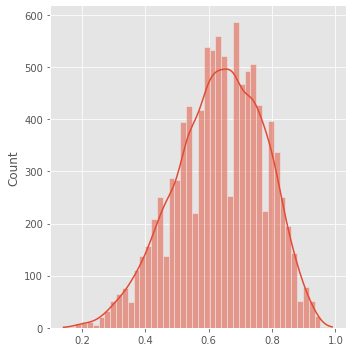

In [93]:
sns.displot(posterior_sample, kde=True)

### What is the probability of the value below 0.5?

In [94]:
np.mean(posterior_sample < 0.5)

0.1761

In [95]:
np.sum(bga.posterior[bga.param_grid < 0.5])

0.17183313110747475

Our sample has very similar value to our true posterior from the grid sampling.

## Obtaining percentile interval

In [96]:
np.quantile(posterior_sample,q=[0.1, 0.9])

array([0.44444444, 0.80808081])

This is fine if the distribution is symmetric, however, in the case of a non symmetric distribution such as a beta(1, 5) distribution below, then the centered interval isn't as useful as the `highest posterior density interval (HPDI)`

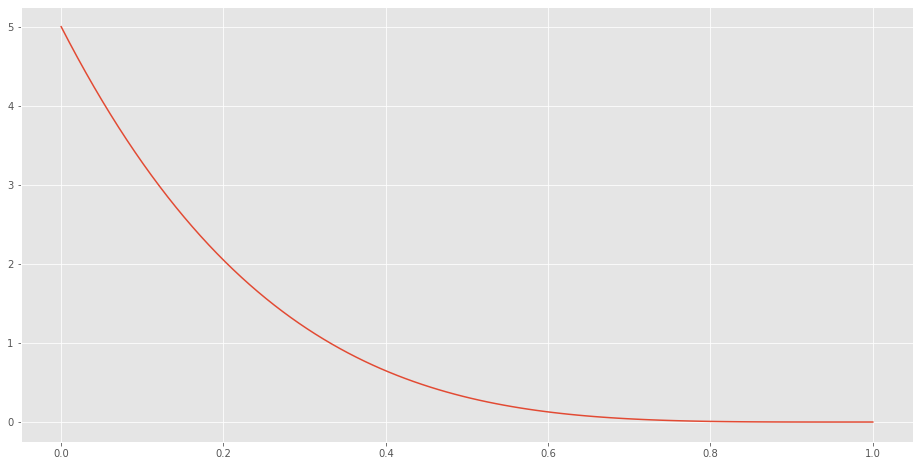

In [108]:
from scipy.stats import beta
grid = np.linspace(0, 1, 100)
plt.plot(grid, beta.pdf(grid, 1, 5))